<a href="https://colab.research.google.com/github/lauracarbaugh/wrangling_assignment/blob/main/wrangling_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lauracarbaugh/wrangling_assignment.git

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (11/11), 5.83 MiB | 12.24 MiB/s, done.


In [ ]:
!git config --global user.name "lauracarbaugh"
!git config --global user.email "rnr7tu@virginia.edu"

In [ ]:
ls

sample_data/  wrangling_assignment/


In [ ]:
cd wrangling_assignment/

/content/wrangling_assignment


In [ ]:
cd data

/content/wrangling_assignment/data


In [ ]:
ls -al

total 12192
drwxr-xr-x 2 root root    4096 Sep  1 19:10 ./
drwxr-xr-x 4 root root    4096 Sep  1 19:10 ../
-rw-r--r-- 1 root root 3414307 Sep  1 19:10 airbnb_hw.csv
-rw-r--r-- 1 root root 7181667 Sep  1 19:10 justice_data.parquet
-rw-r--r-- 1 root root 1873502 Sep  1 19:10 mn_police_use_of_force.csv


In [ ]:
import pandas as pd
import numpy as np
airbnb = pd.read_csv("airbnb_hw.csv")
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# Question 1.1
airbnb['Price'] = airbnb['Price'].str.replace(',', '').str.replace('$', '')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
# I replaced commas with empty space so values over 1,000 are still treated as integers, and then I converted the column to numeric values.
# I also checked for missing values but there were none so I did not change anything

AttributeError: Can only use .str accessor with string values!

In [ ]:
police = pd.read_csv("mn_police_use_of_force.csv")
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
# Question 1.2
police['subject_injury'].unique()



array([nan, 'No', 'Yes'], dtype=object)

In [ ]:
# Question 1.3
justice = pd.read_parquet("justice_data.parquet")
justice['WhetherDefendantWasReleasedPretrial']
justice = justice.rename(columns={'WhetherDefendantWasReleasedPretrial':'released_pretrial'})
justice['released_pretrial'] = justice['released_pretrial'].replace('', np.nan)


In [ ]:
# Question 1.4


justice = pd.read_parquet("justice_data.parquet")

# Step 1: coerce to numeric, treat blanks as NaN
justice['ImposedSentenceAllChargeInContactEvent'] = (
    pd.to_numeric(
        justice['ImposedSentenceAllChargeInContactEvent']
          .replace('', np.nan),
        errors='coerce'
    )
)

# Step 2: if a sentence type never has positive time, fill its missing values with 0
max_by_type = justice.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].transform('max')
mask = (justice['ImposedSentenceAllChargeInContactEvent'].isna()) & (max_by_type == 0)
justice.loc[mask, 'ImposedSentenceAllChargeInContactEvent'] = 0

# Quick check
print(justice['ImposedSentenceAllChargeInContactEvent'].isna().mean())


0.3938484294788132


In [ ]:
# Question 2
from google.colab import drive
drive.mount('/content/drive')

saf = pd.read_excel("/content/drive/My Drive/GSAF5.xls")

Mounted at /content/drive


In [ ]:

!cp "/content/drive/My Drive/GSAF5.xls" /content/wrangling_assignment/data/GSAF5.xls


In [ ]:
!ls /content/wrangling_assignment/data


airbnb_hw.csv  GSAF5.xls  justice_data.parquet	mn_police_use_of_force.csv


In [ ]:
# Question 2.2
saf = saf.dropna(axis=1, how="all")
saf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Question 2.3
saf['Year'] = pd.to_numeric(saf['Year'], errors='coerce')
saf = saf.dropna(subset=['Year'])
saf['Year'] = saf['Year'].astype(int)
saf = saf[saf['Year'] >= 1940]

<Axes: >

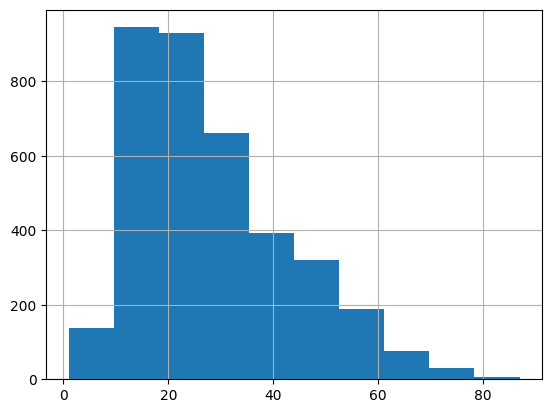

In [ ]:
# Question 2.4
# Convert to string and strip spaces
saf['Age'] = saf['Age'].astype(str).str.strip()

# Extract the first number found in the string (e.g. "20s" -> 20, "15 & 35" -> 15)
saf['Age_clean'] = saf['Age'].str.extract(r'(\d+)')

# Convert to numeric
saf['Age_clean'] = pd.to_numeric(saf['Age_clean'], errors='coerce')

# Keep only reasonable ages
saf = saf[(saf['Age_clean'] >= 1) & (saf['Age_clean'] <= 100)]
saf['Age_clean'].hist()

In [ ]:
# Question 2.5
saf['Sex'].unique()
# Make everything uppercase and strip spaces
saf['Sex_clean'] = saf['Sex'].astype(str).str.strip().str.upper()

# Replace common variants
saf['Sex_clean'] = saf['Sex_clean'].replace({
    'M': 'MALE',
    'MALE': 'MALE',
    'F': 'FEMALE',
    'FEMALE': 'FEMALE'
})
prop_male = (saf['Sex_clean'] == 'MALE').mean()
print(prop_male)

0.8330623306233063


In [ ]:
# Question 2.6
saf['Type'].unique()

# Make everything lowercase and strip spaces
saf['Type_clean'] = saf['Type'].astype(str).str.strip().str.lower()

# Map to the three categories
saf['Type_clean'] = saf['Type_clean'].replace({
    'unprovoked': 'Unprovoked',
    'provoked': 'Provoked',
    # Everything else -> Unknown
})

# Any value not in our mapping is set to Unknown
#saf.loc[~saf['Type_clean'].isin(['Unprovoked','Provoked']), 'Type_clean'] = 'Unknown'

# Calculate proportion of Unprovoked attacks
prop_unprovoked = (saf['Type_clean'] == 'Unprovoked').mean()
print(prop_unprovoked)

0.8284552845528456


In [ ]:
# Question 2.7
#saf['Fatal Y/N'].unique()

# Standardize: strip spaces and make uppercase
#saf['Fatal_clean'] = saf['Fatal (Y/N)'].astype(str).str.strip().str.upper()

# Map common variations
#saf['Fatal_clean'] = saf['Fatal_clean'].replace({
   # 'Y': 'Y',
   # 'N': 'N',
   # 'UNKNOWN': 'Unknown',
   # 'UNK': 'Unknown',
   # '': 'Unknown',
   # 'nan': 'Unknown'
#})

# Anything not Y or N → Unknown
#saf.loc[~saf['Fatal_clean'].isin(['Y', 'N']), 'Fatal_clean'] = 'Unknown'
#print(saf['Fatal_clean'].value_counts())
# check this later

KeyError: 'Fatal (Y/N)'

In [ ]:
# Question 2.8
# Focus only on Male/Female and drop Unknown
subset = saf[saf['Sex_clean'].isin(['MALE', 'FEMALE'])]

# Create a cross-tab of Type by Sex
ct = pd.crosstab(subset['Sex_clean'], subset['Type_clean'])

# Calculate proportions of unprovoked within each sex
ct['Unprovoked_prop'] = ct['Unprovoked'] / ct.sum(axis=1)

print(ct[['Unprovoked', 'Unprovoked_prop']])


Type_clean  Unprovoked  Unprovoked_prop
Sex_clean                              
FEMALE             501         0.868284
MALE              2531         0.823357


In [ ]:
# Question 2.9
# Make a cleaned species column
saf['Species_clean'] = saf['Species '].astype(str).str.lower()

# Check if the word "white" appears anywhere in the species description
saf['Is_white'] = saf['Species_clean'].str.split().apply(lambda x: 'white' in x)

# Calculate proportion
prop_white = saf['Is_white'].mean()
print(f"Proportion of attacks by white sharks: {prop_white:.2f}")


Proportion of attacks by white sharks: 0.12


In [ ]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	GSAF5.xls

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
%cd /content/wrangling_assignment



/content/wrangling_assignment


In [ ]:
! ls

assignment.ipynb  data	README.md  tidy_data.pdf


In [ ]:
!git add .
!git commit -m "Work in progress on wrangling assignment"
!git push

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c8778a597733.(none)')
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
